In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)
from utils import Predictor, Smoother, get_volumes

C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
model = Predictor('tdnn_pso', 32)
data_path = 'dataset/MMM-18.csv'

In [3]:
x, y = model.load_transform(data_path)

In [4]:
print(x.shape, y.shape)

(92, 1, 7, 1) (92, 7)


In [5]:
pred = model.predict(x)
print(pred.shape)

(92, 7)


In [6]:
from sklearn.metrics import explained_variance_score
score = explained_variance_score(y, pred) # 1.0 is best
score

0.9824617114107452

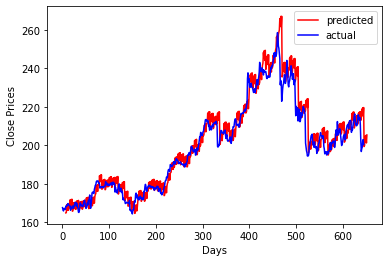

In [7]:
days = np.arange(1, len(y.reshape(1,-1)[0])+1)
plt.plot(days+7, pred.reshape(1,-1)[0], 'r', label='predicted')
plt.plot(days, y.reshape(1,-1)[0], 'b', label='actual')
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

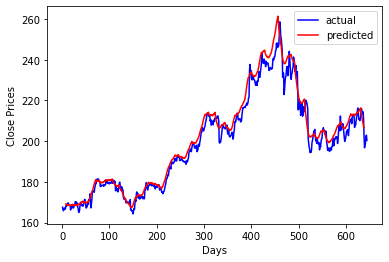

In [16]:
smoother = Smoother(pred.reshape(-1, 1)[:, 0], 14)
transform_pred = smoother.transform('hamming')
days = np.arange(1, len(y.reshape(1,-1)[0])+1)
plt.plot(days, y.reshape(1,-1)[0], 'b', label='actual')
days = np.arange(1, len(transform_pred)+1)
plt.plot(days+7, transform_pred, 'r', label='predicted')
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

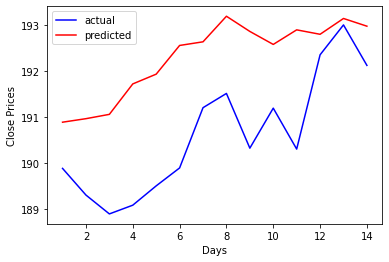

In [17]:
days = np.arange(1, len(y[33:35].reshape(1,-1)[0])+1)
plt.plot(days, y[33:35].reshape(1,-1)[0], 'b', label='actual')
days = np.arange(1, len(transform_pred[32:34])*7+1)
plt.plot(days, transform_pred[32*7:34*7], 'r', label='predicted')
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

In [10]:
volumes = get_volumes(data_path)
print(volumes.shape)

(652,)


In [11]:
transform_pred.shape

(631,)